In [53]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("sonar_dataset.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [8]:
df.shape

(208, 61)

In [11]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [19]:
df.columns[df.dtypes==object]

Int64Index([60], dtype='int64')

In [20]:
# Directly changing the binary nominal class to 0/1  
df[60].replace({'M':1, 'R':0},inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [23]:
x=df.drop(60, axis=1).values
y=df[60].values

In [24]:
x

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [26]:
x.shape, y.shape

((208, 60), (208,))

In [27]:
## The data is already scaled b/w 0 to 1
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
print(f'training size:: x_train:{x_train.shape}, y_train: {y_train.shape}')
print(f'testing size:: x_test:{x_test.shape}, y_test: {y_test.shape}')

training size:: x_train:(166, 60), y_train: (166,)
testing size:: x_test:(42, 60), y_test: (42,)


In [123]:
'''
Building a Model without the Dropout layers
'''

model = keras.Sequential([
    keras.layers.Dense(50, input_shape=(60,), activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

memory = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
6/6 [==============================] - 2s 6ms/step - loss: 0.6970 - accuracy: 0.4337
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5542
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.6084
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6817 - accuracy: 0.6024
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6750 - accuracy: 0.6084
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6665 - accuracy: 0.6566
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6559 - accuracy: 0.6867
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6468 - accuracy: 0.7048
Epoch 9/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6376 - accuracy: 0.6446
Epoch 10/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6252 - accuracy: 0.7771
Epoch 11/200
6/6 [===========

In [124]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_179 (Dense)           (None, 50)                3050      
                                                                 
 dense_180 (Dense)           (None, 30)                1530      
                                                                 
 dense_181 (Dense)           (None, 15)                465       
                                                                 
 dense_182 (Dense)           (None, 5)                 80        
                                                                 
 dense_183 (Dense)           (None, 1)                 6         
                                                                 
Total params: 5,131
Trainable params: 5,131
Non-trainable params: 0
_________________________________________________________________


In [125]:
memory.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 0, 'epochs')

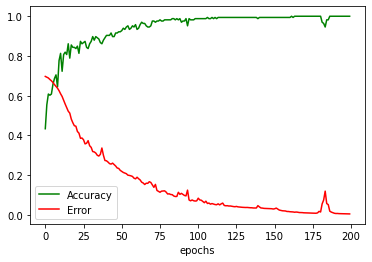

In [126]:
plt.plot(memory.history['accuracy'], color='green', label='Accuracy')
plt.plot(memory.history['loss'], color='red', label='Error')
plt.legend()
plt.xlabel('epochs')

In [127]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4878 - accuracy: 0.9048


[0.4877605438232422, 0.9047619104385376]

In [130]:
yp = model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


In [131]:
y_pred=[]
for val in yp:
    if(val>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.85      1.00      0.92        22

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42



Text(33.0, 0.5, 'predicted')

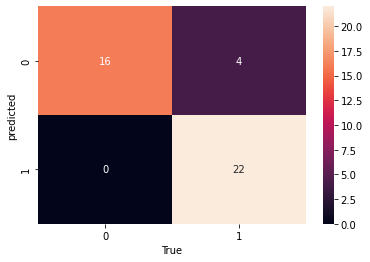

In [133]:
cm = confusion_matrix(y_test, y_pred)

import seaborn as sb
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('True')
plt.ylabel('predicted')

In [134]:
'''
Building a Model with Dropout layers
'''

model_drop = keras.Sequential([
    keras.layers.Dense(50, input_shape=(60,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model_drop.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

memory_drop = model_drop.fit(x_train, y_train, epochs=200)

Epoch 1/200
6/6 [==============================] - 3s 9ms/step - loss: 0.7017 - accuracy: 0.4639
Epoch 2/200
6/6 [==============================] - 0s 10ms/step - loss: 0.7157 - accuracy: 0.4398
Epoch 3/200
6/6 [==============================] - 0s 9ms/step - loss: 0.7169 - accuracy: 0.4639
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7002 - accuracy: 0.5000
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5060
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6882 - accuracy: 0.4759
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.6885 - accuracy: 0.5000
Epoch 8/200
6/6 [==============================] - 0s 13ms/step - loss: 0.7085 - accuracy: 0.4940
Epoch 9/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6911 - accuracy: 0.4819
Epoch 10/200
6/6 [==============================] - 0s 9ms/step - loss: 0.6885 - accuracy: 0.5181
Epoch 11/200
6/6 [=========

In [135]:
model_drop.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 50)                3050      
                                                                 
 dropout_39 (Dropout)        (None, 50)                0         
                                                                 
 dense_185 (Dense)           (None, 30)                1530      
                                                                 
 dropout_40 (Dropout)        (None, 30)                0         
                                                                 
 dense_186 (Dense)           (None, 15)                465       
                                                                 
 dropout_41 (Dropout)        (None, 15)                0         
                                                                 
 dense_187 (Dense)           (None, 5)               

In [136]:
model_drop.evaluate(x_test,y_test)

2/2 [==============================] - 1s 15ms/step - loss: 0.3092 - accuracy: 0.8810


[0.30923935770988464, 0.8809523582458496]

In [146]:
memory_drop.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 0, 'epochs')

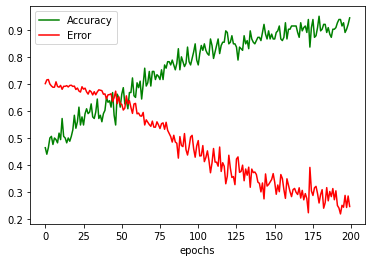

In [137]:
plt.plot(memory_drop.history['accuracy'], color='green', label='Accuracy')
plt.plot(memory_drop.history['loss'], color='red', label='Error')
plt.legend()
plt.xlabel('epochs')

In [142]:
yp_drop = model_drop.predict(x_test)

2/2 [==============================] - 0s 8ms/step


In [143]:
y_pred_drop=[]
for val in yp_drop:
    if(val>0.5):
        y_pred_drop.append(1)
    else:
        y_pred_drop.append(0)

In [144]:
print(classification_report(y_test, y_pred_drop))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.87      0.91      0.89        22

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



Text(33.0, 0.5, 'predicted')

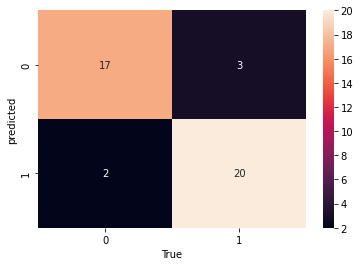

In [145]:
cm_drop = confusion_matrix(y_test, y_pred_drop)

sb.heatmap(cm_drop, annot=True, fmt='d')
plt.xlabel('True')
plt.ylabel('predicted')